In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from sklearn.model_selection import TimeSeriesSplit
import warnings
import datetime as dt
warnings.filterwarnings('ignore') 
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
import random

In this ML project we will go through the data that was gathered from the UK Ministry of Transport. 
Namely, it will be the data reagrding the accidents that took place in 2015

*Description of the dataset's variables

* Location_easting_OSGR: Location easting based on OSGR reference
* Location_northing_OSGR: Location northing based on OSGR reference
* Longitude: Longitude of the accident's place
* Latitude: Latitude of the accident's place
* Police_Force: Police force of the mentioned districts
* Accident_Severity: Severity level of an accident
* Number_of_Vehicles: Number of Vehicles involved in the accident
* Number_of_Casualties: Number of casualties taken place during an accident 
* Date: Date the accident took place
* Day_of_Week: Day of the week when accident occured
* Time: Specific time when an accident occured
* Local_Authority_(District): Local authority in the district 
* Local_Authority_(Highway): Local authority in the highway
* 1st_Road_Class: Class of the first road
* 1st_Road_Number: Number of the first road
* Road_Type: Type of the road
* Speed_limit: Specific speed limit
* Junction_Detail: Detail of the junction
* Junction_Control: Control of the junction
* 2nd_Road_Class: Second road's class
* 2nd_Road_Number: Number of the second road
* Pedestrian_Crossing-Human_Control: Human control nearby accident's place
* Pedestrian_Crossing-Physical_Facilities: Physical facilities crossing nearby accident's place
* Light_Conditions: Condition of the light 
* Weather_Conditions: Weather conditions
* Road_Surface_Conditions: Condition of the surface of the road
* Special_Conditions_at_Site: 
* Carriageway_Hazards: Hazards of the carriageway
* Urban_or_Rural_Area: Was it in an urban or in a rural area
* Did_Police_Officer_Attend_Scene_of_Accident: If Police officer attended an accident scene
* LSOA_of_Accident_Location: Layer Super Output Areas of the accident's location

In [81]:
# Loading the dataset
accidents1 = pd.read_csv('D:/ds/2nd semester/Machine Learning___/project/description/data 2015/Acc.csv') 

In [3]:
print(accidents1.shape)

(140056, 32)


In [14]:
# type of the features
accidents1.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_D

In [15]:
# Analysing the missing values
accidents1.isna().sum()

Accident_Index                                    0
Location_Easting_OSGR                            27
Location_Northing_OSGR                           27
Longitude                                        27
Latitude                                         27
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             18
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

## Detecting Missing values

In [82]:
# Changing -1s to NaN
accidents = accidents1.replace(-1, np.nan)
accidents.isna().sum()

Accident_Index                                     0
Location_Easting_OSGR                             27
Location_Northing_OSGR                            27
Longitude                                         27
Latitude                                          27
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Date                                               0
Day_of_Week                                        0
Time                                              18
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                        0
Junction_Detail                               

In [17]:
# Other features with more NaN (Unknown categories)
accidents['Road_Type'].value_counts()

6    105066
3     20266
1      9589
2      2873
7      1456
9       806
Name: Road_Type, dtype: int64

In [18]:
accidents['Weather_Conditions'].value_counts()

1    113949
2     15559
9      2467
5      2365
4      2353
8      1986
7       662
3       540
6       175
Name: Weather_Conditions, dtype: int64

In [83]:
# Changin the 'Unknown' values of certain features into NaN
accidents.loc[:,['Road_Type','Weather_Conditions']] = accidents.loc[:,['Road_Type','Weather_Conditions']] .replace(9, np.nan)

In [20]:
pd.set_option("display.max_columns",50)
accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,2,18:45,12,E09000020,5,0,6.0,30,3.0,4.0,6.0,0.0,0.0,0.0,4,1.0,1.0,0.0,0.0,1,1.0,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,2,07:50,12,E09000020,6,0,6.0,30,3.0,4.0,3.0,3218.0,0.0,0.0,1,1.0,1.0,0.0,0.0,1,1.0,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,2,18:08,12,E09000020,4,415,6.0,30,2.0,4.0,6.0,0.0,0.0,1.0,4,2.0,2.0,0.0,0.0,1,1.0,E01002833
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,3,07:40,12,E09000020,4,450,6.0,30,6.0,4.0,6.0,0.0,0.0,0.0,1,1.0,2.0,0.0,0.0,1,2.0,E01002874
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,6,07:30,12,E09000020,3,315,6.0,30,6.0,2.0,3.0,3220.0,0.0,5.0,1,2.0,2.0,0.0,0.0,1,2.0,E01002814


# Data Exploration

Text(0.5,0,'1 - Slight ,  2 - Medium  , 3 - Fatal')

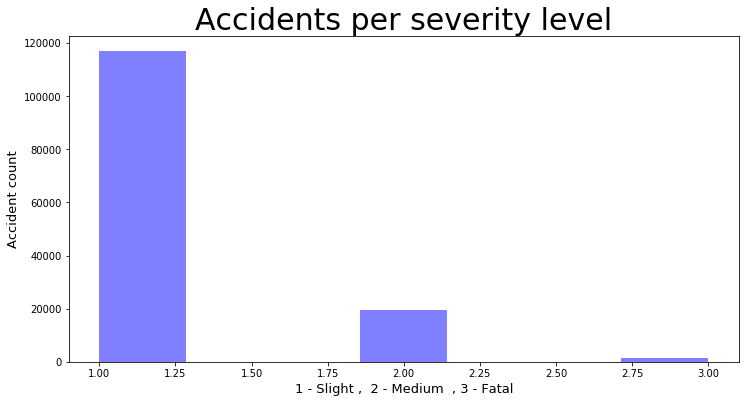

In [75]:
### Plotting the histograms
### Plotting the histograms
dow = {1:3, 2:2, 3:1}
accidents["Accident_Severity"]=accidents.Accident_Severity.map(dow)
accidents['Accident_Severity'].value_counts()

# data = accidents.loc[:, ['Accident_Severity']] 
plt.figure(figsize=(12,6))
accidents.Accident_Severity.hist(bins=7,alpha=0.5, color= 'blue')
# figure = data.plot(kind='hist', subplots=True, layout=(3,3), figsize = (18,18), sharex=False, sharey=False)
# plt.show()

plt.title('Accidents per severity level' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 13)

plt.xlabel('1 - Slight ,  2 - Medium  , 3 - Fatal', fontsize = 13)

Text(0.5, 0, '0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday')

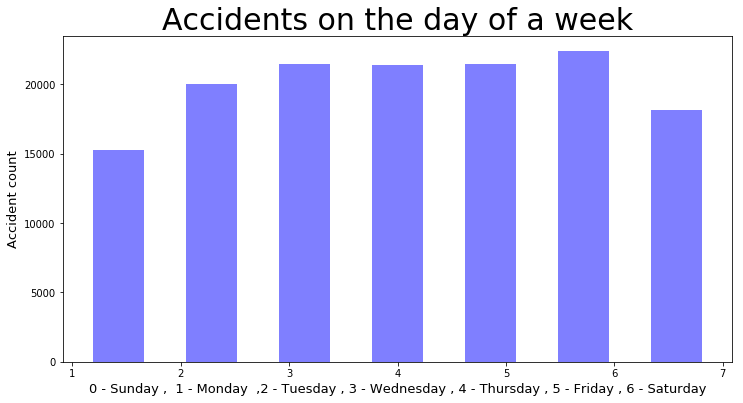

In [22]:
# Number of accidents per week days
plt.figure(figsize=(12,6))
accidents.Day_of_Week.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'blue')
plt.title('Accidents on the day of a week' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 13)

plt.xlabel('0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday' , fontsize = 13)

In [84]:
# Forming a new variable Date_Time, to make analysis more easier
accidents['Date_time'] =  accidents['Date'] +' '+ accidents['Time']
accidents['Date_time'] = pd.to_datetime(accidents.Date_time)
accidents.drop(['Date','Time'],axis =1 , inplace=True)
# accidents.dropna(inplace=True)

Text(0, 0.5, 'Accidents')

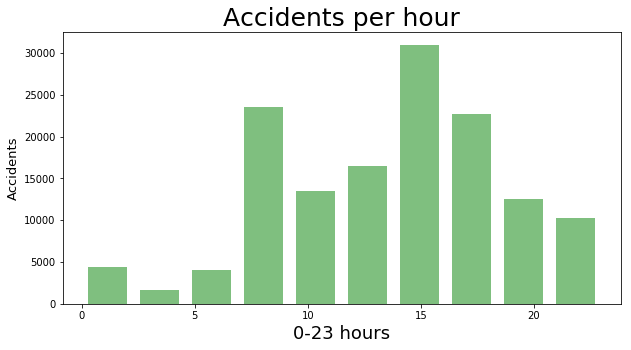

In [25]:
plt.figure(figsize=(10,5))
accidents.Date_time.dt.hour.hist(rwidth=0.75,alpha =0.50, color= 'green')
plt.title('Accidents per hour',fontsize= 25)
plt.grid(False)
plt.xlabel('0-23 hours' , fontsize = 18)
plt.ylabel('Accidents' , fontsize = 13)

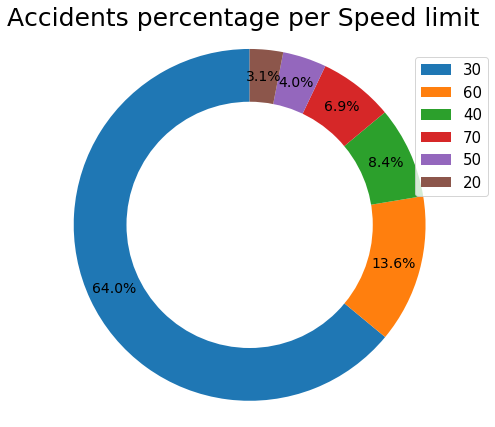

In [26]:
# Accident per speed limits
speed_limit_acc = accidents.loc[accidents['Speed_limit'].isin(['20' ,'30' ,'40' ,'50' ,'60' ,'70'])]
speed  = speed_limit_acc.Speed_limit.value_counts()

# Pie chart
#explosion
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
plt.pie(speed.values, labels=None, autopct='%1.1f%%', pctdistance=0.85, labeldistance=1.9 , shadow=False, startangle=90,textprops={'fontsize': 14})

#drawing the circle
c_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(c_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.legend(speed.index, bbox_to_anchor=(1,0.7), loc="center right", fontsize=15, bbox_transform=plt.gcf().transFigure)
plt.figtext(.5,.9,'Accidents percentage per Speed limit', fontsize=25, ha='center')
plt.show()

In [78]:
# Changing the name of the categories
# weather = {1:'Fine no high winds', 2:'Raining no high winds', 3:'Snowing no high winds', 4:'Fine + high winds',5:'Raining + high winds', 6: 'Snowing + high winds', 7:'Fog or mist', 8:'Other', 9:'Unknown'}
# accidents["Weather_Conditions"]=accidents.Weather_Conditions.map(weather)

Text(0.5,1,'Accidents per weather condition')

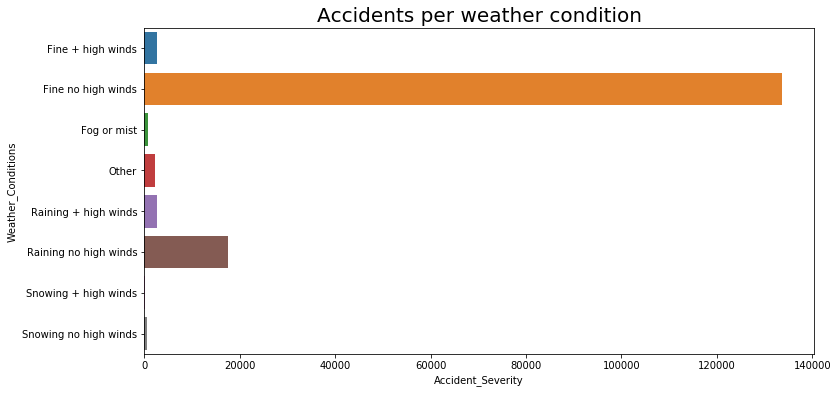

In [79]:
# Plot about the Weather condition

grouping = accidents[['Weather_Conditions','Accident_Severity']]
weath_sev = grouping.groupby(by = 'Weather_Conditions',as_index=False).sum()
plt.figure(figsize=(12, 6))
sns.barplot(weath_sev['Accident_Severity'],weath_sev['Weather_Conditions']).set_title('Accidents per weather condition', fontsize=20)

In [28]:
# Descriptive stats
pd.set_option("display.max_columns",50)
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
description = accidents.describe()
print(description)

# It should be pointed out that due to the largeness of the dataset, we have an issue regarding the outliers for some variables
# For instance: Number of vehicles, number of casualties, age of vehicle, etc.
# Thus we get rid of outliers's of these specific variables
# For most of the variables we do not notice these outliers, since they are categorical features, turned into numerical

       Location_Easting_OSGR  Location_Northing_OSGR   Longitude    Latitude  Police_Force  \
count             140029.000               1.400e+05  140029.000  140029.000    140056.000   
mean              446913.896               2.899e+05      -1.330      52.497        29.902   
std                94893.264               1.578e+05       1.394       1.421        25.218   
min                70860.000               1.063e+04      -7.423      49.916         1.000   
25%               385626.000               1.766e+05      -2.216      51.475         6.000   
50%               451460.000               2.409e+05      -1.236      52.052        30.000   
75%               526760.000               3.912e+05      -0.173      53.415        45.000   
max               655282.000               1.198e+06       1.758      60.661        98.000   

       Accident_Severity  Number_of_Vehicles  Number_of_Casualties  Day_of_Week  \
count         140056.000          140056.000            140056.000   1

## Continuous Features

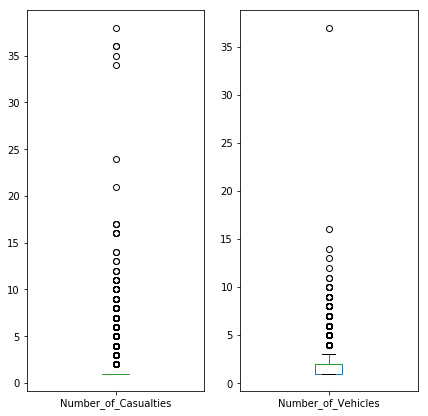

In [29]:
dataset = accidents.loc[:, ['Number_of_Casualties', 'Number_of_Vehicles']]
dataset.plot(kind='box', subplots=True, figsize = (7,7), sharex=False, sharey=False)
plt.show()

Text(0, 0.5, 'Accident count')

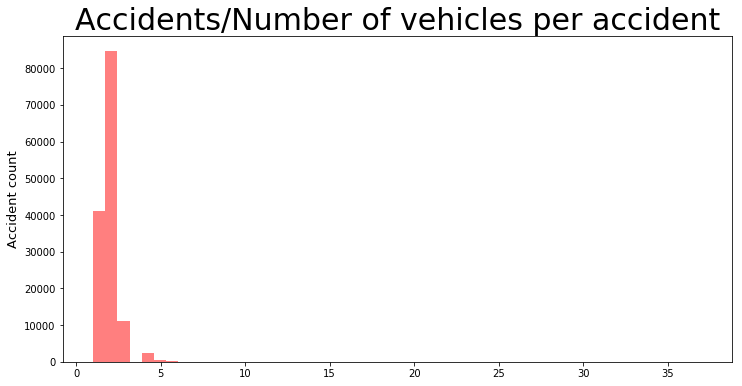

In [30]:
plt.figure(figsize=(12,6))
accidents.Number_of_Vehicles.hist(bins = 50, alpha=0.5, color= 'red')
# figure = data.plot(kind='hist', subplots=True, layout=(3,3), figsize = (18,18), sharex=False, sharey=False)
# plt.show()

plt.title('Number of vehicles per accident' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 13)

In [85]:
# Using the std deviation methodology to detect the outliers
data_mean, data_std = mean(accidents.loc[:, 'Number_of_Casualties']), std(accidents.loc[:, 'Number_of_Casualties'])

# identify outliers
cut_off = data_std * 4
upper = data_mean + cut_off
outliers = [x for x in accidents.loc[:, 'Number_of_Casualties'] if x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 1330


In [86]:
# Using the std deviation methodology to detect the outliers - Number_of_Vehicles
data_mean1, data_std1 = mean(accidents.loc[:, 'Number_of_Vehicles']), std(accidents.loc[:, 'Number_of_Vehicles'])

# identify outliers
cut_off1 = data_std1 * 4
upper1 = data_mean1 + cut_off1
outliers = [x for x in accidents.loc[:, 'Number_of_Vehicles'] if x > upper1]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 825


In [87]:
# Analyzing the values with the missing values
### Use the information criteria, the explanatory ability of the variables
print(len(accidents[(accidents['Number_of_Casualties']>upper)]),"Number_of_Casualties outliers were removed")
accidents = accidents[accidents['Number_of_Casualties']<upper]

1330 Number_of_Casualties outliers were removed


In [88]:
print(len(accidents[(accidents['Number_of_Vehicles']>upper1)]),"Number_of_Vehicles outliers were removed")
accidents = accidents[accidents['Number_of_Vehicles']<upper1]

725 Number_of_Vehicles outliers were removed


In [35]:
# Description of the variables, after removing the outliers
description1 = accidents['Number_of_Vehicles'].describe()
description2 = accidents['Number_of_Casualties'].describe()
print(description1)
print(description2)

count    138001.000
mean          1.814
std           0.638
min           1.000
25%           1.000
50%           2.000
75%           2.000
max           4.000
Name: Number_of_Vehicles, dtype: float64
count    138001.000
mean          1.283
std           0.615
min           1.000
25%           1.000
50%           1.000
75%           1.000
max           4.000
Name: Number_of_Casualties, dtype: float64


In [36]:
accidents.isna().sum()

Accident_Index                                     0
Location_Easting_OSGR                             27
Location_Northing_OSGR                            27
Longitude                                         27
Latitude                                          27
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Day_of_Week                                        0
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                        800
Speed_limit                                        0
Junction_Detail                                    1
Junction_Control                               54868
2nd_Road_Class                                

In [37]:
# Imputation of missing values
accidents['Junction_Control'].value_counts()

4.0    67992
2.0    14281
3.0      688
1.0      172
Name: Junction_Control, dtype: int64

In [38]:
# Imputation of missing values
accidents['2nd_Road_Class'].value_counts()

6.0    56507
3.0    13672
5.0     5928
4.0     5576
1.0      830
2.0       95
Name: 2nd_Road_Class, dtype: int64

In [89]:
# Replacing missing values with the mode of each particular variable
accidents = accidents.apply(lambda x:x.fillna(x.value_counts().index[0]))
accidents.isna().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-

# Discrete Features

## Ordinal Feature:
* Light conditoins - as the number increases the light condition worsens (i.e. ) 
* Weather conditions 
* Road surface conditions 
* Special condition at site

## Nominal Features: 
* Police force 
* Day of Week 
* 1st road class 
* 2nd road class
* Road type 
* Junction detail
* Junction Control
* Pedestrian crossing hum + phys 
* Carriageway hazard 
* Urban Rural 
* Did police attend the accident



## Police Force

In [41]:
# Police force represents the region from which the police has responded
accidents['Police_Force'].value_counts()

1     24743
20     5997
13     5193
43     5111
46     4792
44     4313
47     4223
50     3786
45     3783
42     3695
4      3629
97     3539
10     3190
6      3020
14     2999
52     2958
31     2718
5      2646
21     2546
41     2470
16     2345
7      2272
22     2255
33     2223
62     2159
32     2107
30     2100
95     2053
12     2026
35     1937
55     1750
36     1723
54     1560
23     1472
37     1468
40     1450
60     1306
63     1301
34     1300
3      1276
11     1060
17      923
53      804
61      685
92      650
96      496
93      474
91      439
94      423
48      345
98      268
Name: Police_Force, dtype: int64

In [90]:
# Grouping the categories into 5
s = [1,20,13,43]
accidents.Police_Force.loc[~accidents.Police_Force.isin(s)] = 0

In [91]:
#Naming those categories according to the database  
policeforce = {0:'Other',1:'Metropolitan', 20:'West Midlands', 13:'West Yorkshire',43:'Thames Valley'}
accidents["Police_Force"]=accidents.Police_Force.map(policeforce)
print(accidents.Police_Force.unique())

['Metropolitan' 'Other' 'West Yorkshire' 'West Midlands' 'Thames Valley']


In [92]:
accidents['Police_Force'].value_counts()

Other             96957
Metropolitan      24743
West Midlands      5997
West Yorkshire     5193
Thames Valley      5111
Name: Police_Force, dtype: int64

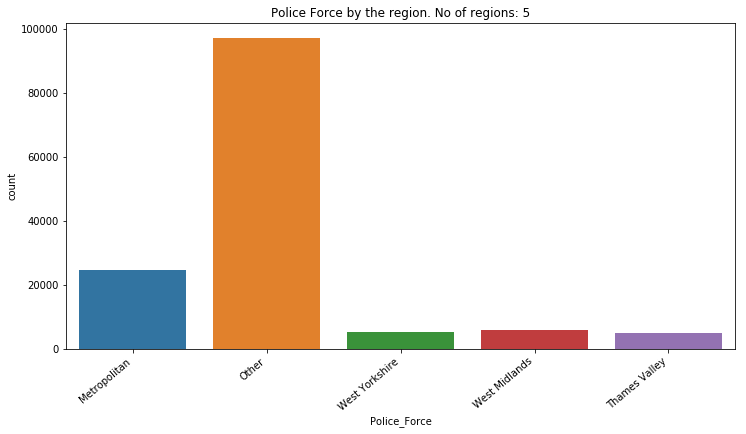

In [56]:
# Below we present the structure of the Police force after modifications

plt.figure(figsize=(12, 6))
plt.title('Police Force by the region. No of regions: %i' %len(accidents.groupby('Police_Force').agg('Police_Force')))
RN = sns.countplot(accidents['Police_Force'])
RN.set_xticklabels(RN.get_xticklabels(), rotation=40, ha="right")
plt.show()

## Day of the Week

In [17]:
accidents['Day_of_Week'].value_counts()

6    22061
5    21199
3    21164
4    21102
2    19737
7    17778
1    14960
Name: Day_of_Week, dtype: int64

In [93]:
#Naming those categories according to the database  
dow = {1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday',5:'Thursday',6:'Friday', 7:'Saturday'}
accidents["Day_of_Week"]=accidents.Day_of_Week.map(dow)
print(accidents.Day_of_Week.unique())

['Monday' 'Tuesday' 'Friday' 'Thursday' 'Sunday' 'Wednesday' 'Saturday']


In [19]:
accidents['Day_of_Week'].value_counts()

Friday       22061
Thursday     21199
Tuesday      21164
Wednesday    21102
Monday       19737
Saturday     17778
Sunday       14960
Name: Day_of_Week, dtype: int64

## 1st Road Class

In [60]:
# A,B,and C are the importance of the road classes
# Unclassified is representing the small road w/o classes
accidents['1st_Road_Class'].value_counts()

3    63241
0    41931
4    17025
5    10963
1     4841
Name: 1st_Road_Class, dtype: int64

In [94]:
# Grouping the categories into 5
s = [1,3,4,5]
accidents['1st_Road_Class'].loc[~accidents['1st_Road_Class'].isin(s)] = 0

In [95]:
#Naming those categories according to the database  
dow = {3:'A', 0:'Unclassified',1:'M', 4:'B', 5:'C'}
accidents["1st_Road_Class"]=accidents['1st_Road_Class'].map(dow)
print(accidents['1st_Road_Class'].unique())

['C' 'Unclassified' 'B' 'A' 'M']


In [22]:
accidents['1st_Road_Class'].value_counts()

A               63241
Unclassified    41931
B               17025
C               10963
M                4841
Name: 1st_Road_Class, dtype: int64

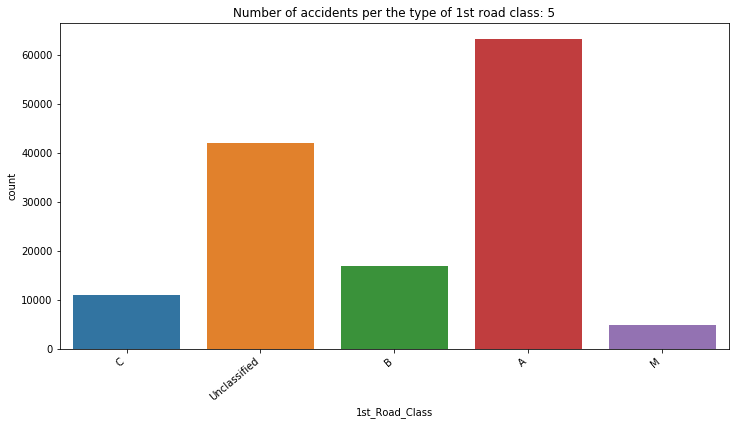

In [55]:
# Below we present the number of accidents per the type of 1st road class
# 

plt.figure(figsize=(12, 6))
plt.title('Number of accidents per the type of 1st road class: %i' %len(accidents.groupby('1st_Road_Class').agg('1st_Road_Class')))
RN = sns.countplot(accidents['1st_Road_Class'])
RN.set_xticklabels(RN.get_xticklabels(), rotation=40, ha="right")
plt.show()

## 2nd Road Class

In [24]:
accidents['2nd_Road_Class'].value_counts()

6.0    111900
3.0     13672
5.0      5928
4.0      5576
1.0       830
2.0        95
Name: 2nd_Road_Class, dtype: int64

In [96]:
# Grouping 
s = [1,3,4,5]
accidents['2nd_Road_Class'].loc[~accidents['2nd_Road_Class'].isin(s)] = 0

#Naming those categories according to the database  
dow = {3:'A', 0:'UC', 4:'B', 5:'C', 1:'M'}
accidents["2nd_Road_Class"]=accidents['2nd_Road_Class'].map(dow)
print(accidents['2nd_Road_Class'].unique())

accidents['2nd_Road_Class'].value_counts()

['UC' 'A' 'C' 'B' 'M']


UC    111995
A      13672
C       5928
B       5576
M        830
Name: 2nd_Road_Class, dtype: int64

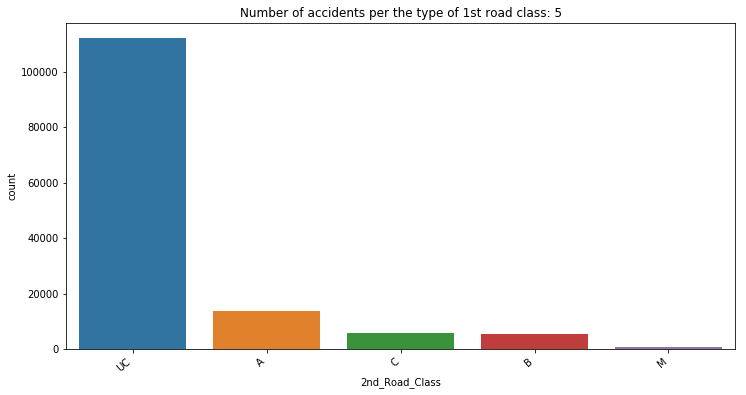

In [54]:
# Below we present the number of accidents per the type of 2nd road class

plt.figure(figsize=(12, 6))
plt.title('Number of accidents per the type of 1st road class: %i' %len(accidents.groupby('2nd_Road_Class').agg('2nd_Road_Class')))
RN = sns.countplot(accidents['2nd_Road_Class'])
RN.set_xticklabels(RN.get_xticklabels(), rotation=40, ha="right")
plt.show()

## Road Type

In [27]:
accidents['Road_Type'].value_counts() 

6.0    104585
3.0     19606
1.0      9527
2.0      2851
7.0      1432
Name: Road_Type, dtype: int64

In [97]:
# Grouping
s = [6,3,1,2]
accidents['Road_Type'].loc[~accidents['Road_Type'].isin(s)] = 0

#Naming those categories according to the database  
dow = {6:'Single cw', 3:'Dual cw', 1:'Roundabout',2:'One way street', 0:'UC'} 
accidents["Road_Type"]=accidents['Road_Type'].map(dow)
print(accidents['Road_Type'].unique())

accidents['Road_Type'].value_counts() 

['Single cw' 'Roundabout' 'Dual cw' 'One way street' 'UC']


Single cw         104585
Dual cw            19606
Roundabout          9527
One way street      2851
UC                  1432
Name: Road_Type, dtype: int64

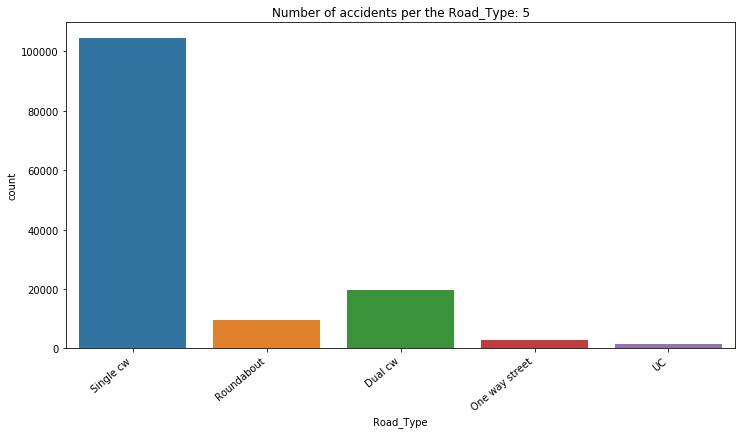

In [53]:
# Below we present the number of accidents per the road type
plt.figure(figsize=(12, 6))
plt.title('Number of accidents per the Road_Type: %i' %len(accidents.groupby('Road_Type').agg('Road_Type')))
RN = sns.countplot(accidents['Road_Type'])
RN.set_xticklabels(RN.get_xticklabels(), rotation=40, ha="right")
plt.show()

## Junction control

In [30]:
accidents['Junction_Control'].value_counts()  #Junction_Control

4.0    122860
2.0     14281
3.0       688
1.0       172
Name: Junction_Control, dtype: int64

In [98]:
#Naming those categories according to the database  
dow = {1:'Auth Person', 2:'Auto trafic signal', 3:'Stop sign', 4:'Give way/uncontrolled'} 
accidents["Junction_Control"]=accidents['Junction_Control'].map(dow) 
print(accidents['Junction_Control'].unique()) 

accidents['Junction_Control'].value_counts() 

['Give way/uncontrolled' 'Auto trafic signal' 'Stop sign' 'Auth Person']


Give way/uncontrolled    122860
Auto trafic signal        14281
Stop sign                   688
Auth Person                 172
Name: Junction_Control, dtype: int64

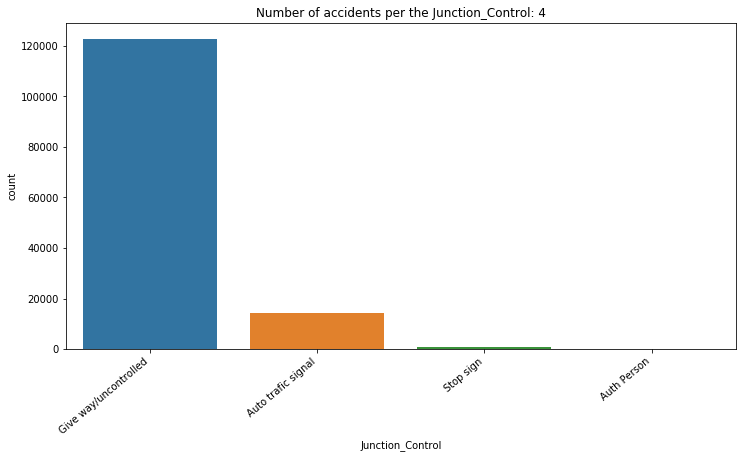

In [52]:
# Below we present the number of accidents per the Junction Control

plt.figure(figsize=(12, 6))
plt.title('Number of accidents per the Junction_Control: %i' %len(accidents.groupby('Junction_Control').agg('Junction_Control')))
RN = sns.countplot(accidents['Junction_Control'])
RN.set_xticklabels(RN.get_xticklabels(), rotation=40, ha="right")
plt.show()

# Pedestrian Crossing Human Control

In [33]:
accidents['Pedestrian_Crossing-Human_Control'].value_counts()  #Pedestrian_Crossing-Physical_Facilities

0.0    137291
2.0       428
1.0       282
Name: Pedestrian_Crossing-Human_Control, dtype: int64

In [99]:
# Grouping
s = [0] 
accidents['Pedestrian_Crossing-Human_Control'].loc[~accidents['Pedestrian_Crossing-Human_Control'].isin(s)] = 1

#Naming those categories according to the database  
dow = {0:0, 1:1} 
accidents["Pedestrian_Crossing-Human_Control"]=accidents['Pedestrian_Crossing-Human_Control'].map(dow) 
print(accidents['Pedestrian_Crossing-Human_Control'].unique()) 

accidents['Pedestrian_Crossing-Human_Control'].value_counts() 

[0 1]


0    137291
1       710
Name: Pedestrian_Crossing-Human_Control, dtype: int64

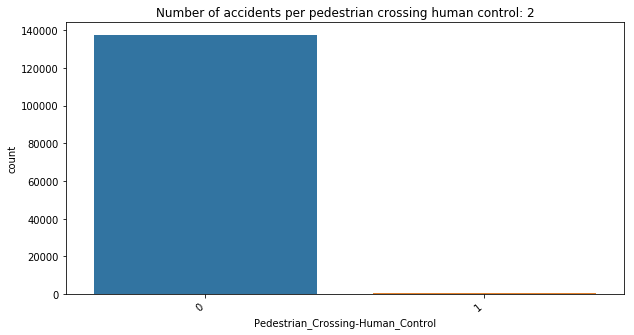

In [51]:
# Below we present the number of accidents per pedestrian crossing human control

plt.figure(figsize=(10, 5))
plt.title('Number of accidents per pedestrian crossing human control: %i' %len(accidents.groupby('Pedestrian_Crossing-Human_Control').agg('Pedestrian_Crossing-Human_Control')))
RN = sns.countplot(accidents['Pedestrian_Crossing-Human_Control'])
RN.set_xticklabels(RN.get_xticklabels(), rotation=40, ha="right")
plt.show()

# Pedestrian crossing physical facilities

In [37]:
accidents['Pedestrian_Crossing-Physical_Facilities'].value_counts()

0.0    111794
5.0     10750
4.0      7681
1.0      4260
8.0      3130
7.0       386
Name: Pedestrian_Crossing-Physical_Facilities, dtype: int64

In [100]:
# Grouping
s = [0] 
accidents['Pedestrian_Crossing-Physical_Facilities'].loc[~accidents['Pedestrian_Crossing-Physical_Facilities'].isin(s)] = 1

#Naming those categories according to the database  
dow = {0:0, 1:1} 
accidents["Pedestrian_Crossing-Physical_Facilities"]=accidents['Pedestrian_Crossing-Physical_Facilities'].map(dow) 
print(accidents['Pedestrian_Crossing-Physical_Facilities'].unique()) 

accidents['Pedestrian_Crossing-Physical_Facilities'].value_counts() 

[0 1]


0    111794
1     26207
Name: Pedestrian_Crossing-Physical_Facilities, dtype: int64

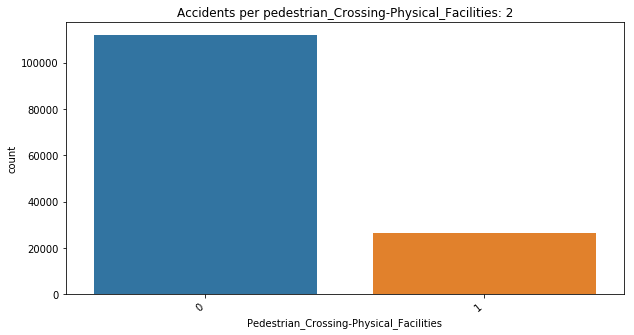

In [50]:
# Below we present the number of accidents per the pedestrian crossing physical fascilities

plt.figure(figsize=(10, 5))
plt.title('Accidents per pedestrian_Crossing-Physical_Facilities: %i' %len(accidents.groupby('Pedestrian_Crossing-Physical_Facilities').agg('Pedestrian_Crossing-Physical_Facilities')))
RN = sns.countplot(accidents['Pedestrian_Crossing-Physical_Facilities'])
RN.set_xticklabels(RN.get_xticklabels(), rotation=40, ha="right")
plt.show()

# Urban or Rural

In [40]:
accidents['Urban_or_Rural_Area'].value_counts()

1    91161
2    46840
Name: Urban_or_Rural_Area, dtype: int64

In [101]:
#Naming those categories according to the database  
dow = {1:1, 2:0} 
accidents["Urban_or_Rural_Area"]=accidents['Urban_or_Rural_Area'].map(dow) 
print(accidents['Urban_or_Rural_Area'].unique()) 

accidents['Urban_or_Rural_Area'].value_counts() 

[1 0]


1    91161
0    46840
Name: Urban_or_Rural_Area, dtype: int64

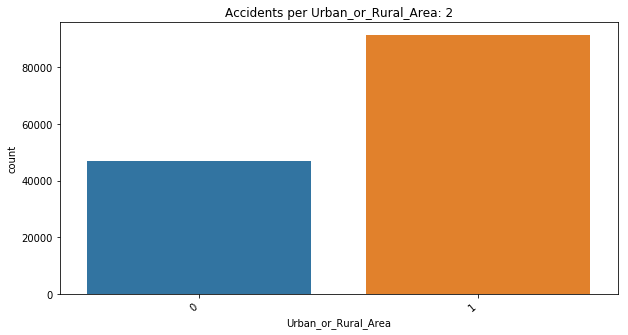

In [49]:
# Below we present the number of accidents per the urban/rural area

plt.figure(figsize=(10,5))
plt.title('Accidents per Urban_or_Rural_Area: %i' %len(accidents.groupby('Urban_or_Rural_Area').agg('Urban_or_Rural_Area')))
RN = sns.countplot(accidents['Urban_or_Rural_Area'])
RN.set_xticklabels(RN.get_xticklabels(), rotation=40, ha="right")
plt.show()

# Police attendance

In [102]:
s = [1] 
accidents['Did_Police_Officer_Attend_Scene_of_Accident'].loc[~accidents['Did_Police_Officer_Attend_Scene_of_Accident'].isin(s)] = 2

In [103]:
#Naming those categories according to the database  
dow = {1:1, 2:0} 
accidents["Did_Police_Officer_Attend_Scene_of_Accident"]=accidents['Did_Police_Officer_Attend_Scene_of_Accident'].map(dow) 
print(accidents['Did_Police_Officer_Attend_Scene_of_Accident'].unique()) 

accidents['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts() 

[1 0]


1    110658
0     27343
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

In [104]:
accidents.rename(columns={'Did_Police_Officer_Attend_Scene_of_Accident': 'Police attendance'}, inplace=True)

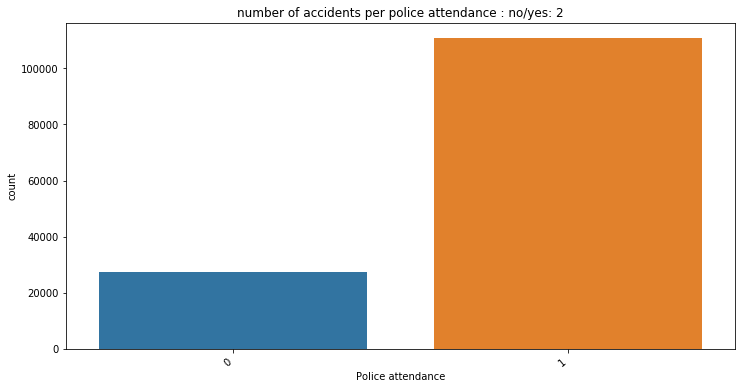

In [76]:
# Below we present the number of accidents per police attendance : yes/no

plt.figure(figsize=(12,6))
plt.title('number of accidents per police attendance : no/yes: %i' %len(accidents.groupby('Police attendance').agg('Police attendance')))
RN = sns.countplot(accidents['Police attendance'])
RN.set_xticklabels(RN.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [105]:
# One hot encoding the relevant columns
accidents= pd.get_dummies(accidents, columns=[ 'Road_Type', '2nd_Road_Class', '1st_Road_Class', 'Day_of_Week', 'Police_Force','Junction_Control'])

In [92]:
# 'Junction_Control'weather = {'Fine no high winds':1, 'Raining no high winds':2, 'Snowing no high winds':3, 'Fine + high winds':4, 'Raining + high winds':5, 'Snowing + high winds':6, 'Fog or mist':7, 'Other':8}a
# accidents["Weather_Conditions"]=accidents.Weather_Conditions.map(weather)

In [106]:
print(accidents.shape)

(138001, 56)


In [94]:
pd.set_option("display.max_columns",50)
accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Police attendance,LSOA_of_Accident_Location,Date_time,...,2nd_Road_Class_A,2nd_Road_Class_B,2nd_Road_Class_C,2nd_Road_Class_UC,1st_Road_Class_A,1st_Road_Class_B,1st_Road_Class_C,1st_Road_Class_M,1st_Road_Class_Unclassified,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,Police_Force_Metropolitan,Police_Force_Other,Police_Force_Thames Valley,Police_Force_West Midlands,Police_Force_West Yorkshire,Junction_Control_Auth Person,Junction_Control_Auto trafic signal,Junction_Control_Give way/uncontrolled,Junction_Control_Stop sign
0,201501BS70001,525130.0,180050.0,-0.198,51.506,1,1,1,12,E09000020,0,30,3.0,0.0,0,0.0,4,1.0,1.0,0.0,0.0,1,1,E01002825,2015-12-01 18:45:00,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,201501BS70002,526530.0,178560.0,-0.179,51.492,1,1,1,12,E09000020,0,30,3.0,3218.0,0,0.0,1,1.0,1.0,0.0,0.0,1,1,E01002820,2015-12-01 07:50:00,...,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,201501BS70004,524610.0,181080.0,-0.206,51.515,1,1,1,12,E09000020,415,30,2.0,0.0,0,1.0,4,2.0,2.0,0.0,0.0,1,1,E01002833,2015-12-01 18:08:00,...,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,201501BS70005,524420.0,181080.0,-0.208,51.515,1,1,1,12,E09000020,450,30,6.0,0.0,0,0.0,1,1.0,2.0,0.0,0.0,1,0,E01002874,2015-01-13 07:40:00,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
4,201501BS70008,524630.0,179040.0,-0.206,51.497,2,2,1,12,E09000020,315,30,6.0,3220.0,0,5.0,1,2.0,2.0,0.0,0.0,1,0,E01002814,2015-09-01 07:30:00,...,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


Text(0.5,1,'Correlations graph')

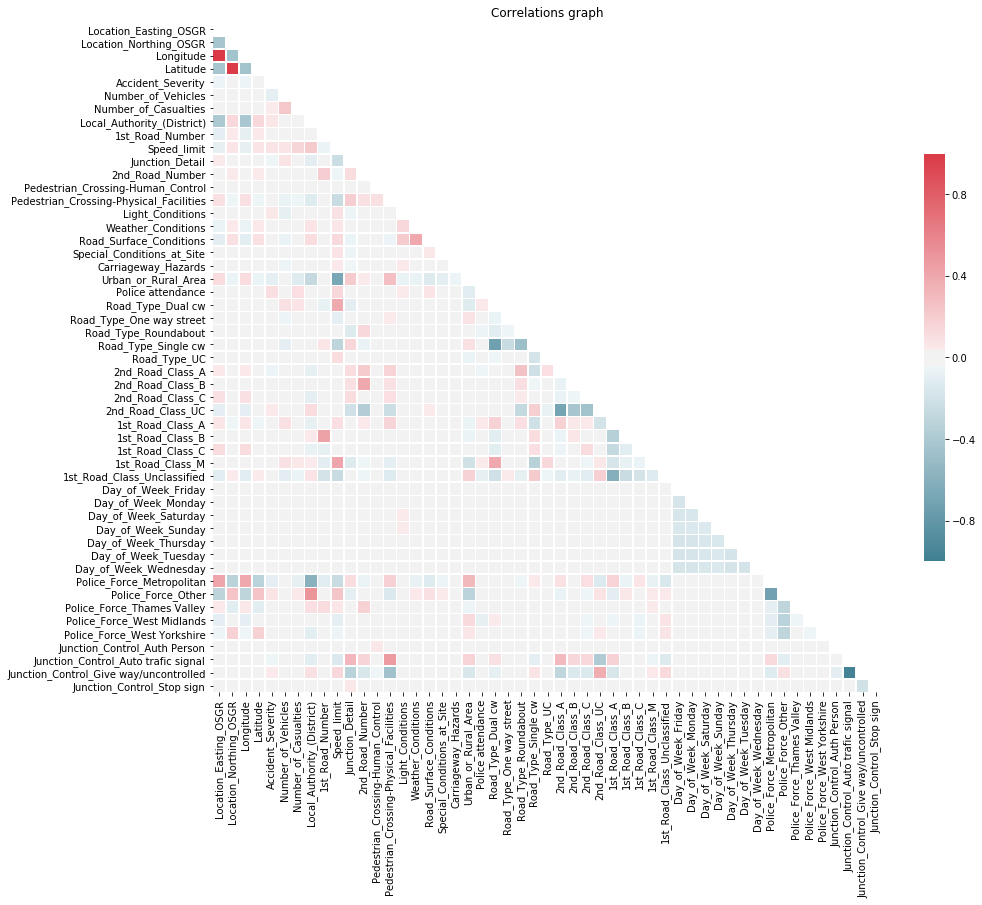

In [35]:
# Generate a mask for the upper triangle
cor = accidents.corr()
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f = plt.subplots(figsize=(15,15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title('Correlations graph')

# Looking at the figure, we can conclude that there are some variable which are correlated with each other (pos or neg). Namely:
# Age of Driver - Age band of driver
# Junction Location - (Junction detail, Junction control, 2nd road class(which will be eliminated soon))
# Vehicle reference - Number of the vehicle
# Local Authority - Police force
# Longitude - Location Easting OSGR (will be eliminated soon)
# Latitude - Location Northing OSGR
# Basically the variables (Location Easting OSGR, Location Northing OSGR, Police force, Longitude and latitude) are
# intercorrelated with each other

In [107]:
# Dropping the columns which are composed of unique values for each observation
# 1st road number and 2nd road number dropped out, not useful at all
### First 4 feature showing the location
### Deleting mostly correlated variables
accidents.drop(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Junction_Detail', 'Local_Authority_(Highway)', 'Longitude', 'Latitude', 'LSOA_of_Accident_Location', 'Local_Authority_(District)', '1st_Road_Number', '2nd_Road_Number', 'Date_time', 'Police_Force_Metropolitan','Junction_Control_Auto trafic signal'], inplace=True, axis=1)

print(accidents.shape)

(138001, 42)


In [37]:
accidents.head(10)

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Speed_limit,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Police attendance,Road_Type_Dual cw,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single cw,Road_Type_UC,2nd_Road_Class_A,2nd_Road_Class_B,2nd_Road_Class_C,2nd_Road_Class_UC,1st_Road_Class_A,1st_Road_Class_B,1st_Road_Class_C,1st_Road_Class_M,1st_Road_Class_Unclassified,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,Police_Force_Other,Police_Force_Thames Valley,Police_Force_West Midlands,Police_Force_West Yorkshire,Junction_Control_Auth Person,Junction_Control_Auto trafic signal,Junction_Control_Give way/uncontrolled,Junction_Control_Stop sign
0,1,1,1,30,0,0,4,1.0,1.0,0.0,0.0,1,1.0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,1,1,30,0,0,1,1.0,1.0,0.0,0.0,1,1.0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,1,1,30,0,1,4,2.0,2.0,0.0,0.0,1,1.0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,1,1,30,0,0,1,1.0,2.0,0.0,0.0,1,0.0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,2,2,1,30,0,1,1,2.0,2.0,0.0,0.0,1,0.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,1,2,1,30,0,1,1,1.0,2.0,0.0,0.0,1,1.0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
6,1,2,1,30,0,1,1,8.0,2.0,0.0,0.0,1,1.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
7,1,2,1,30,0,0,1,1.0,1.0,0.0,0.0,1,1.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
8,1,2,1,30,0,1,1,1.0,1.0,0.0,0.0,1,1.0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,1,2,2,30,0,0,1,8.0,1.0,0.0,0.0,1,1.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


# Feature selection based on the feature importance

In [61]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

col_names = ['Number_of_Vehicles', 'Number_of_Casualties', 'Light_Conditions', 'Weather_Conditions', 'Speed_limit', 'Urban_or_Rural_Area', '1st_Road_Class_A', '1st_Road_Class_B', '1st_Road_Class_C', '2nd_Road_Class_A', '2nd_Road_Class_B', '2nd_Road_Class_C','Day_of_Week_Friday',
'Day_of_Week_Monday', 'Day_of_Week_Saturday', 'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday','Junction_Control_Auto trafic signal', 'Junction_Control_Give way/uncontrolled','Junction_Control_Stop sign', 'Road_Type_Dual cw', 'Road_Type_One way street','Road_Type_Roundabout', 'Police attendance'] 

X = accidents[col_names] # Variables
y = accidents.Accident_Severity # Target feature

In [62]:
# Looking for the most optimal features
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[0.13435184 0.09272859 0.08680359 0.15828463 0.15461563 0.03107215
 0.0335161  0.02619654 0.01721613 0.01367449 0.02048085 0.02126151
 0.01577479 0.01600597 0.01312156 0.01124663 0.01542735 0.014885
 0.01496731 0.00637217 0.00755407 0.00333249 0.02640448 0.01159119
 0.01467247 0.03844246]


In [63]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

col_names = ['Number_of_Vehicles', 'Number_of_Casualties', 'Light_Conditions', 'Weather_Conditions', 'Speed_limit', 'Urban_or_Rural_Area', '1st_Road_Class_A', '1st_Road_Class_B', '1st_Road_Class_C', '2nd_Road_Class_A', '2nd_Road_Class_B', '2nd_Road_Class_C','Day_of_Week_Friday',
'Day_of_Week_Monday', 'Day_of_Week_Saturday', 'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday','Junction_Control_Auto trafic signal', 'Junction_Control_Give way/uncontrolled', 'Road_Type_Dual cw', 'Road_Type_One way street','Road_Type_Roundabout', 'Police attendance'] 

X = accidents[col_names] # Variables
y = accidents.Accident_Severity # Target feature

In [64]:
# Looking for the most optimal features
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[0.13330412 0.08915712 0.07897029 0.16549209 0.16134082 0.02681802
 0.03111099 0.02544106 0.02018319 0.01558611 0.01814148 0.02024241
 0.01620273 0.0153604  0.0127414  0.01288267 0.01518831 0.01470229
 0.01697966 0.0073893  0.00975518 0.02850176 0.01098942 0.01690803
 0.03661117]


In [65]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

col_names = ['Number_of_Vehicles', 'Number_of_Casualties', 'Light_Conditions', 'Weather_Conditions', 'Speed_limit', 'Urban_or_Rural_Area', '1st_Road_Class_A', '1st_Road_Class_B', '1st_Road_Class_C', '2nd_Road_Class_A', '2nd_Road_Class_B', '2nd_Road_Class_C','Day_of_Week_Friday',
'Day_of_Week_Monday', 'Day_of_Week_Saturday', 'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday', 'Junction_Control_Give way/uncontrolled', 'Road_Type_Dual cw', 'Road_Type_One way street','Road_Type_Roundabout', 'Police attendance'] 

X = accidents[col_names] # Variables
y = accidents.Accident_Severity # Target feature

In [66]:
# Looking for the most optimal features
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[0.14214777 0.09996071 0.09309858 0.16308436 0.13950775 0.02706725
 0.02883942 0.02190722 0.01858517 0.0216747  0.01898592 0.0190751
 0.01448558 0.01364672 0.01281793 0.01229818 0.01366256 0.01481592
 0.01463435 0.02313902 0.01974997 0.01101149 0.01751029 0.03829403]


In [116]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

col_names = ['Number_of_Vehicles', 'Number_of_Casualties', 'Light_Conditions', 'Weather_Conditions', 'Speed_limit', 'Urban_or_Rural_Area', '1st_Road_Class_A', '1st_Road_Class_B', '1st_Road_Class_C', '2nd_Road_Class_A', '2nd_Road_Class_B', '2nd_Road_Class_C','Day_of_Week_Friday',
'Day_of_Week_Monday', 'Day_of_Week_Saturday', 'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday', 'Junction_Control_Give way/uncontrolled', 'Road_Type_Dual cw', 'Road_Type_Roundabout', 'Police attendance'] 

X = accidents[col_names] # Variables
y = accidents.Accident_Severity # Target feature

In [68]:
# Looking for the most optimal features
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[0.13176623 0.09217328 0.09328143 0.16681561 0.15800026 0.03332575
 0.0309537  0.02291606 0.01723706 0.02059819 0.02120623 0.02092153
 0.01434492 0.01417526 0.0106786  0.01215455 0.01535792 0.01394487
 0.01369385 0.01909436 0.02471256 0.01617631 0.03647147]


# Decision Tree

In [125]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

# Creating DT object
clf = DecisionTreeClassifier()

# Training
clf = clf.fit(X_train,y_train)

#Predicting
y_pred = clf.predict(X_test)


In [126]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) # 

Accuracy: 0.8091011195246549


In [127]:
# Optimizing the DT performance (Using such hyperparameters as entropy which is feature selection measure 'default is gini')
# DT object
dt_clf = DecisionTreeClassifier(criterion="entropy")

# Training 
dt_clf = clf.fit(X_train,y_train)

#Predicting
y_pred = dt_clf.predict(X_test)

# Accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8080866635266838


In [128]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Root Mean Squared Error: 0.479309975870621


# KNN Classifier

In [132]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

Xs = scale(X)
scl= StandardScaler()

Xs_train = scl.fit_transform(X_train)
Xs_test = scl.transform(X_test)

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split

knn = KNeighborsClassifier(n_neighbors = 5)

Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)
knn_model_2 = knn.fit(Xs_train, y_train)
print('k-NN score for test set: %f' % knn_model_2.score(Xs_test, y_test))
print('k-NN score for training set: %f' % knn_model_2.score(Xs_train, y_train))

k-NN score for test set: 0.824572
k-NN score for training set: 0.840652


In [135]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Root Mean Squared Error: 0.4326700384785407


# Random Forest

In [130]:
import sklearn as sk  
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)  
RF = RF.fit(X_train, y_train)  
y_pred = RF.predict(X_test)  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.8475417557334879


In [131]:
 print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Root Mean Squared Error: 0.428800827462191


# Cross validation and comparison

In [73]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# configuration
seed = 5

# preparing the models
md = []
md.append(('KNN', KNeighborsClassifier()))
md.append(('DTree', DecisionTreeClassifier()))
md.append(('RForest', RandomForestClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in md:
    k_fold = model_selection.KFold(n_splits=5, random_state=seed)
    cvres = model_selection.cross_val_score(model, X, y, cv=k_fold, scoring=scoring)
    results.append(cvres)
    names.append(name)
    message = "%s: %f" % (name, cvres.mean())
    print(message)

KNN: 0.825269
DTree: 0.821349
RForest: 0.828407


# Conclusion

In [ ]:
# For all models we have the almost the same accuracies which is around 82%
# But it needs to be mentioned that according to the RMSE numbers Random Forest model outperforms other two 
# taking into account the accuracy and the RMSE measure